In [38]:
import fastf1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
# Enable FastF1 caching
fastf1.Cache.enable_cache("f1_cache")

# Load 2024 Chinese GP race session
session_2024 = fastf1.get_session(2024, "China", "R")
session_2024.load()

# Extract lap and sector times
laps_2024 = session_2024.laps[["Driver", "LapTime", "Sector1Time", "Sector2Time", "Sector3Time"]].copy()
laps_2024.dropna(inplace=True)
for col in ["LapTime", "Sector1Time", "Sector2Time", "Sector3Time"]:
    laps_2024[f"{col} (s)"] = laps_2024[col].dt.total_seconds()

# Group by driver for average sector times
sector_times_2024 = laps_2024.groupby("Driver")[["Sector1Time (s)", "Sector2Time (s)", "Sector3Time (s)"]].mean().reset_index()

# 2025 Qualifying Data
qualifying_2025 = pd.DataFrame({
    "Driver": ["Oscar Piastri", "George Russell", "Lando Norris", "Max Verstappen", "Lewis Hamilton",
               "Charles Leclerc", "Isack Hadjar", "Andrea Kimi Antonelli", "Yuki Tsunoda", "Alexander Albon",
               "Esteban Ocon", "Nico Hülkenberg", "Fernando Alonso", "Lance Stroll", "Carlos Sainz Jr.",
               "Pierre Gasly", "Oliver Bearman", "Jack Doohan", "Gabriel Bortoleto", "Liam Lawson"],
    "QualifyingTime (s)": [90.641, 90.723, 90.793, 90.817, 90.927,
                           91.021, 91.079, 91.103, 91.638, 91.706,
                           91.625, 91.632, 91.688, 91.773, 91.840,
                           91.992, 92.018, 92.092, 92.141, 92.174]
})

# Driver mapping
driver_mapping = {
    "Oscar Piastri": "PIA", "George Russell": "RUS", "Lando Norris": "NOR", "Max Verstappen": "VER",
    "Lewis Hamilton": "HAM", "Charles Leclerc": "LEC", "Isack Hadjar": "HAD", "Andrea Kimi Antonelli": "ANT",
    "Yuki Tsunoda": "TSU", "Alexander Albon": "ALB", "Esteban Ocon": "OCO", "Nico Hülkenberg": "HUL",
    "Fernando Alonso": "ALO", "Lance Stroll": "STR", "Carlos Sainz Jr.": "SAI", "Pierre Gasly": "GAS",
    "Oliver Bearman": "BEA", "Jack Doohan": "DOO", "Gabriel Bortoleto": "BOR", "Liam Lawson": "LAW"
}
qualifying_2025["DriverCode"] = qualifying_2025["Driver"].map(driver_mapping)

# Merge data
merged_data = qualifying_2025.merge(sector_times_2024, left_on="DriverCode", right_on="Driver", how="left")



core           INFO 	Loading data for Chinese Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:08.313000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '11', '16', '55', '63', '14', '81', '44', '27', '31', '23

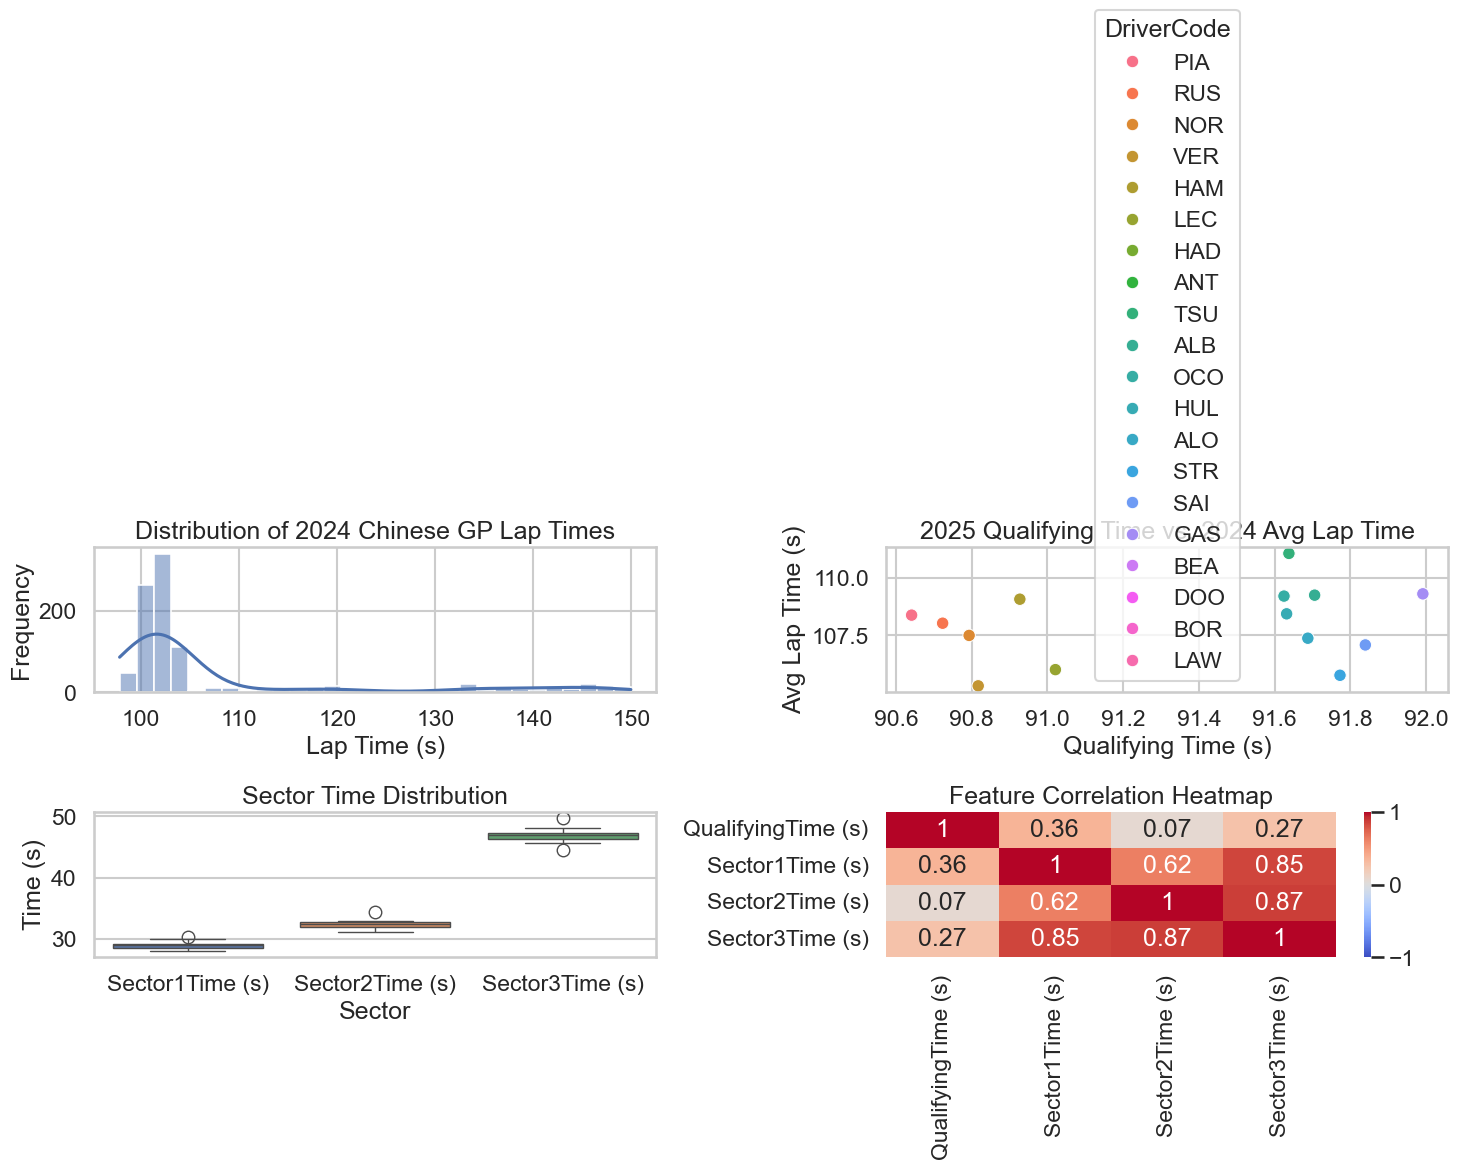

In [50]:

plt.figure(figsize=(15, 10))

# 1. Distribution of Lap Times
plt.subplot(2, 2, 1)
sns.histplot(laps_2024["LapTime (s)"], bins=30, kde=True)
plt.title("Distribution of 2024 Chinese GP Lap Times")
plt.xlabel("Lap Time (s)")
plt.ylabel("Frequency")

# 2. Qualifying vs. Lap Time Scatter
plt.subplot(2, 2, 2)
sns.scatterplot(data=merged_data, x="QualifyingTime (s)", y=laps_2024.groupby("Driver")["LapTime (s)"].mean().reindex(merged_data["DriverCode"]).values, hue="DriverCode")
plt.title("2025 Qualifying Time vs. 2024 Avg Lap Time")
plt.xlabel("Qualifying Time (s)")
plt.ylabel("Avg Lap Time (s)")

# 3. Sector Times Box Plot
plt.subplot(2, 2, 3)
sector_melt = pd.melt(sector_times_2024, id_vars="Driver", value_vars=["Sector1Time (s)", "Sector2Time (s)", "Sector3Time (s)"], var_name="Sector", value_name="Time")
sns.boxplot(data=sector_melt, x="Sector", y="Time", hue="Sector")
plt.title("Sector Time Distribution")
plt.xlabel("Sector")
plt.ylabel("Time (s)")

# 4. Correlation Heatmap
plt.subplot(2, 2, 4)
corr = merged_data[["QualifyingTime (s)", "Sector1Time (s)", "Sector2Time (s)", "Sector3Time (s)"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")

plt.tight_layout()
plt.savefig("f1_eda_2025_visualizations.png")
plt.show()
 

In [36]:

# Summary Statistics
print("Summary Statistics for 2024 Chinese GP Lap Times:")
print(laps_2024[["LapTime (s)", "Sector1Time (s)", "Sector2Time (s)", "Sector3Time (s)"]].describe())
print("\nMissing Data Check:")
print(merged_data.isnull().sum()) 

Summary Statistics for 2024 Chinese GP Lap Times:
       LapTime (s)  Sector1Time (s)  Sector2Time (s)  Sector3Time (s)
count   987.000000       987.000000       987.000000       987.000000
mean    108.067720        28.868190        32.386207        46.813323
std      13.888636         4.819085         4.524878         6.316523
min      97.810000        26.034000        29.306000        42.398000
25%     100.928000        26.860500        30.290500        43.622000
50%     101.998000        27.139000        30.715000        43.977000
75%     103.918500        27.510000        31.367000        44.662000
max     149.965000        63.258000        52.321000        70.577000

Missing Data Check:
Driver_x              0
QualifyingTime (s)    0
DriverCode            0
Driver_y              6
Sector1Time (s)       6
Sector2Time (s)       6
Sector3Time (s)       6
dtype: int64
